In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df.describe()

df.isnull().sum()



df.corr()["MedHouseVal"].sort_values(ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508


In [5]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
3,AveBedrms,0.783145
0,MedInc,0.448675
1,HouseAge,0.009724
4,Population,-0.000002
5,AveOccup,-0.003526
2,AveRooms,-0.123323
6,Latitude,-0.419792
7,Longitude,-0.433708


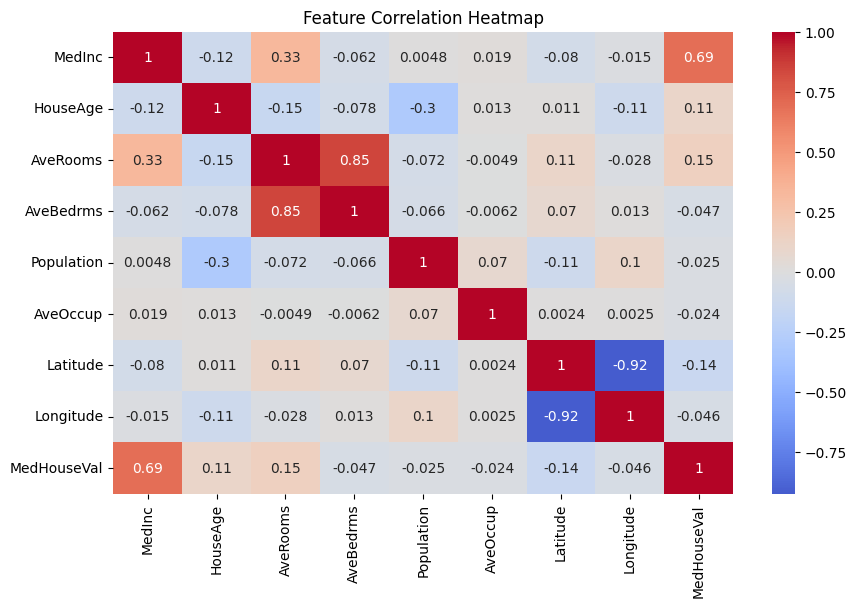

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

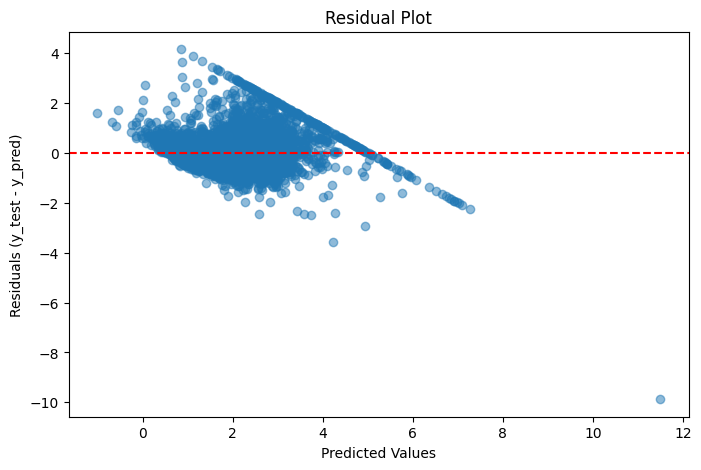

In [7]:
import numpy as np

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()

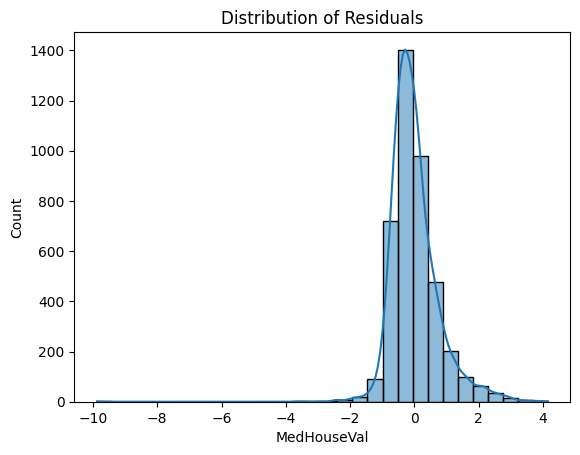

In [8]:
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.show()


In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Ridge MSE: 0.5558034669932211
Ridge R²: 0.5758549611440126


In [10]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)   # smaller alpha to avoid killing all features
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso R²:", r2_score(y_test, y_pred_lasso))


Lasso MSE: 0.6135115198058131
Lasso R²: 0.5318167610318159


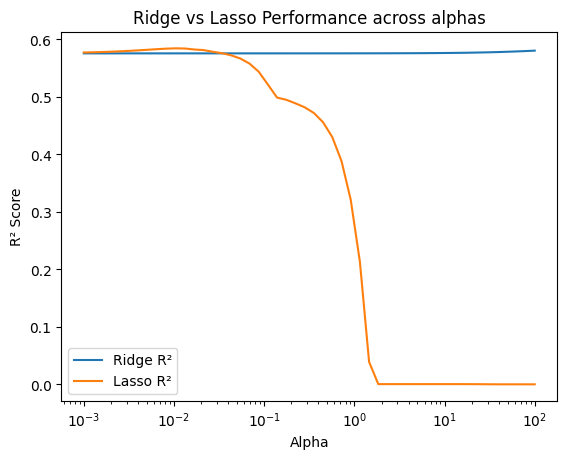

In [11]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 2, 50)
ridge_scores, lasso_scores = [], []

for a in alphas:
    ridge_scores.append(Ridge(alpha=a).fit(X_train, y_train).score(X_test, y_test))
    lasso_scores.append(Lasso(alpha=a, max_iter=10000).fit(X_train, y_train).score(X_test, y_test))

plt.plot(alphas, ridge_scores, label="Ridge R²")
plt.plot(alphas, lasso_scores, label="Lasso R²")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.legend()
plt.title("Ridge vs Lasso Performance across alphas")
plt.show()
